In [1082]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

In [1083]:
data = pd.read_csv("ca_singlefam_listing.csv")

In [1084]:
data.head()

,property_id,prop_type,price,baths_half,baths_full,beds,city,postal_code,state_code,county,building_size,lot_size
0,M1420126120,single_family,499700,0.0,3.0,4,Dixon,95620,CA,Solano,2169.0,4783.0
1,M2415397004,single_family,340000,0.0,2.0,3,Sacramento,95826,CA,Sacramento,1270.0,5920.0
2,M1186346624,single_family,375900,0.0,3.0,4,Citrus Heights,95610,CA,Sacramento,1736.0,6098.0
3,M2897618299,single_family,395000,0.0,2.0,3,Sacramento,95826,CA,Sacramento,1516.0,6739.0
4,M2738139661,single_family,1275000,0.0,3.0,3,Sacramento,95831,CA,Sacramento,3375.0,24202.0


In [1085]:
data.shape

(1938, 12)

In [1086]:
data.describe()

,price,baths_half,baths_full,beds,postal_code,building_size,lot_size
count,1.938000e+03,1938.000000,1935.000000,1938.000000,1938.000000,1938.000000,1.938000e+03
mean,1.355565e+06,0.325593,2.459948,3.585139,93376.052632,2219.891641,8.756488e+04
std,3.101489e+06,0.549816,1.366357,1.090734,1411.851429,1653.106483,3.108139e+06
min,2.570000e+03,0.000000,1.000000,0.000000,90001.000000,384.000000,9.800000e+02
25%,4.730750e+05,0.000000,2.000000,3.000000,92551.000000,1395.000000,5.227000e+03
50%,7.850000e+05,0.000000,2.000000,3.000000,93306.000000,1845.000000,7.000000e+03
75%,1.425000e+06,1.000000,3.000000,4.000000,94556.000000,2597.000000,1.000000e+04
max,1.000000e+08,5.000000,28.000000,20.000000,95961.000000,41000.000000,1.367784e+08


In [1087]:
data.count()

property_id      1938
prop_type        1938
price            1938
baths_half       1938
baths_full       1935
beds             1938
city             1938
postal_code      1938
state_code       1938
county           1937
building_size    1938
lot_size         1938
dtype: int64

In [1088]:
data.isnull().sum()

property_id      0
prop_type        0
price            0
baths_half       0
baths_full       3
beds             0
city             0
postal_code      0
state_code       0
county           1
building_size    0
lot_size         0
dtype: int64

In [1089]:
data['baths_full'] = data['baths_full'].fillna(0)
data['county'] = data['county'].fillna(0)

In [1090]:
X = data[["baths_half", "baths_full", "beds", "city", "building_size" ]]

In [1091]:
#converting Categorical atrr to numeric
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
enc = LabelEncoder()
data.iloc[:,6] = enc.fit_transform(data.iloc[:,6])

In [1092]:
data.head()

,property_id,prop_type,price,baths_half,baths_full,beds,city,postal_code,state_code,county,building_size,lot_size
0,M1420126120,single_family,499700,0.0,3.0,4,33,95620,CA,Solano,2169.0,4783.0
1,M2415397004,single_family,340000,0.0,2.0,3,121,95826,CA,Sacramento,1270.0,5920.0
2,M1186346624,single_family,375900,0.0,3.0,4,22,95610,CA,Sacramento,1736.0,6098.0
3,M2897618299,single_family,395000,0.0,2.0,3,121,95826,CA,Sacramento,1516.0,6739.0
4,M2738139661,single_family,1275000,0.0,3.0,3,121,95831,CA,Sacramento,3375.0,24202.0


In [1093]:
X = data[["baths_half", "baths_full", "beds", "city", "building_size", "lot_size" ]]
# onehot = OneHotEncoder(categories="auto")
# X = onehot.fit_transform(X).toarray()

In [1094]:
y = data["price"].values.reshape(-1, 1)
print(X.shape, y.shape)

(1938, 6) (1938, 1)


In [1095]:
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1096]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2, random_state=2)
X_train

,baths_half,baths_full,beds,city,building_size,lot_size
369,0.0,4.0,4,124,3264.0,2996.0
1154,0.0,2.0,3,156,1365.0,6761.0
1669,0.0,3.0,3,133,1297.0,8712.0
14,0.0,3.0,4,118,2508.0,12985.0
1465,0.0,1.0,1,117,832.0,8712.0
...,...,...,...,...,...,...
1558,0.0,2.0,3,117,2336.0,3881.0
1608,0.0,2.0,3,117,980.0,10019.0
493,0.0,3.0,4,124,1903.0,2996.0
527,0.0,2.0,3,94,1592.0,4640.0


In [1097]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScater model and fit it to the training data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [1098]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

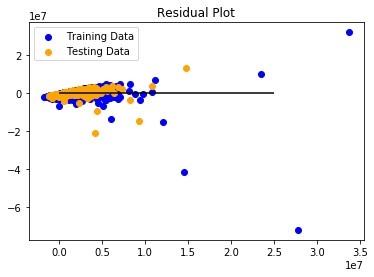

In [1099]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
predictions = model.predict(X_test)
model.fit(X_train, y_train)
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [1100]:
from sklearn.metrics import mean_squared_error
#MSE = mean_squared_error(y_train, predictions)
r2 = model.score(X_train, y_train)
r2

0.360442439494965

In [1101]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 3644203875088.766, R2: 0.24348524615577696


In [1102]:
predictions = model.predict(X_test)
print(f"True output: {y_test[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y_test[0]}")

True output: [850000]
Predicted output: [844280.11531419]
Prediction Error: [-5719.88468581]


In [1103]:
# pd.DataFrame({"Predicted": predictions, "Actual": y, "Error": predictions - y})